target
Negative    52658
Positive    49342
Name: target, dtype: int64


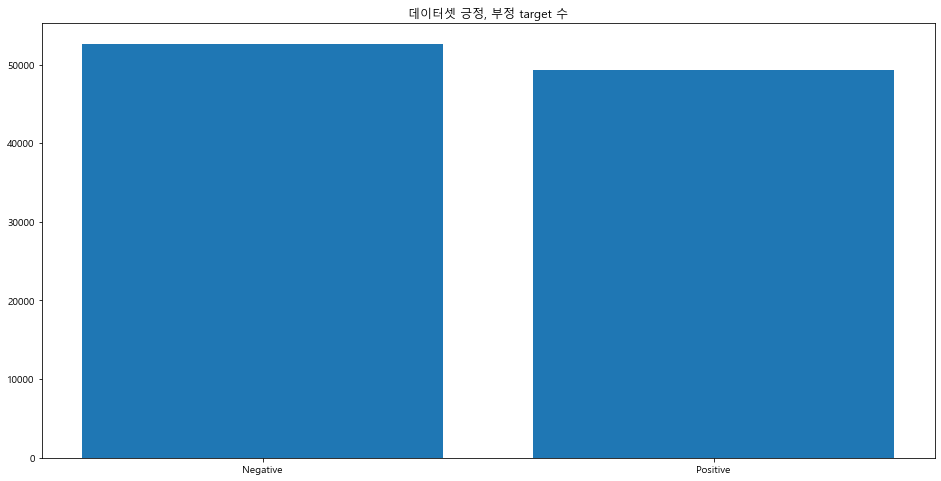

target text 0 negative awww thats bummer shoulda got david carr third 1 negative upset cant update facebook texting might cry r 2 negative dived many times ball managed save 50 rest go 3 negative whole body feels itchy like fire 4 negative no not behaving im mad cant see
TRAIN size: 81600
TEST size: 20400


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('worried', 0.4552094340324402), ('disappointed', 0.4474252760410309), ('pregnant', 0.4424591064453125), ('surprised', 0.4288201928138733), ('mad', 0.41231584548950195), ('bummed', 0.40885046124458313), ('sad', 0.38673609495162964), ('pissed', 0.3830167353153229), ('sry', 0.3693575859069824), ('scared', 0.36850211024284363)]
Total words 49563
y_train (81600, 1)
y_test (20400, 1)
(49563, 300)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 516, 300)          14868900  
_________________________________________________________________
dropout_3 (Dropout)          (None, 516, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

C:\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


73440/73440 [==============================] - 3731s 51ms/step - loss: 0.5195 - accuracy: 0.7437 - val_loss: 0.4901 - val_accuracy: 0.7637
Epoch 3/8
73440/73440 [==============================] - 1696s 23ms/step - loss: 0.5090 - accuracy: 0.7517 - val_loss: 0.4845 - val_accuracy: 0.7657
Epoch 4/8
73440/73440 [==============================] - 1260s 17ms/step - loss: 0.4994 - accuracy: 0.7554 - val_loss: 0.4815 - val_accuracy: 0.7676
Epoch 5/8
73440/73440 [==============================] - 1239s 17ms/step - loss: 0.5038 - accuracy: 0.7533 - val_loss: 0.4813 - val_accuracy: 0.7707
Epoch 6/8
73440/73440 [==============================] - 1218s 17ms/step - loss: 0.4947 - accuracy: 0.7592 - val_loss: 0.4781 - val_accuracy: 0.7696
Epoch 7/8
73440/73440 [==============================] - 1210s 16ms/step - loss: 0.4889 - accuracy: 0.7627 - val_loss: 0.4794 - val_accuracy: 0.7696
Epoch 8/8
20400/20400 [==============================] - 69s 3ms/step

ACCURACY: 0.7801470756530762
LOSS: 0.46336715

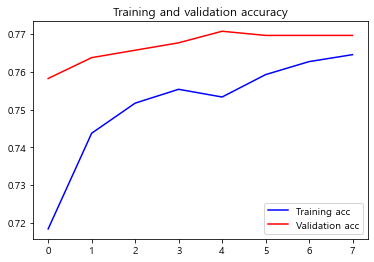

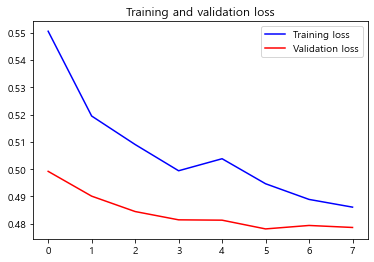

{'label': 'Positive', 'score': 0.9269675016403198}
{'label': 'Neutral', 'score': 0.4521547257900238}
{'label': 'Neutral', 'score': 0.6917550563812256}
20400/20400 [==============================] - 74s 4ms/step
[[8336 2237]
 [2248 7579]]
0.7801470588235294


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

##################################### 트윗 긍정,부정 10만개 csv파일 읽어오기####################################
dataset="C:/Users/castl/Desktop/2020_job_academy/project/emotion_analysis/input/tweets_10man.csv"
df=pd.read_csv(dataset,encoding ='ISO-8859-1',names=['target','text'])



# 숫자로 표현된 target 긍정,부정,중립으로 decode 
decode_map = {0: "Negative", 2: "Neutral", 4: "Positive"}

def decode_sentiment(label):
    return decode_map[int(label)]

df.target = df.target.apply(lambda x: decode_sentiment(x))



#  트윗 csv파일에 긍정,부정 data 갯수 분석
import collections 
import matplotlib

a=df.groupby(['target'])['target'].count()
print(a)

target_cnt = collections.Counter(df.target)

# matplotlib 한글 설정
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("데이터셋 긍정, 부정 target 수")
plt.show()


################################# 트윗 csv 파일 'texts' 전처리 #################################

# 불용어 사전제작
garbage_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']

# 어간 추출
import nltk

stemmer = nltk.stem.SnowballStemmer("english")


# text 전처리
import re

def preprocess(text, stem=False):
    # 불필요한 불용어 및 특수문자, id 등 제거
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9']+", ' ', str(text).lower()).strip()
    
    # 토큰화 
    tokens = []
    for token in text.split():
        token=token.replace("'","")
        if token not in garbage_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

df.text = df.text.apply(lambda x: preprocess(x))


print(preprocess(df.head(5)))


############################## 훈련세트, 테스트세트 분할 하기 #################################
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))


############################# Word2Vec ###############################
import gensim

#train의 text를 단어별로 
document = [toks.split() for toks in df_train.text]

# Word2Vec 모델 생성
w2v_model = gensim.models.word2vec.Word2Vec(size=300, window=7,min_count=5, workers=8)
w2v_model.build_vocab(document)


# Word2Vec 모델 훈련
w2v_model.train(document, total_examples=len(document), epochs=32)

# Word2Vec 유사 단어 추출
print(w2v_model.most_similar("upset"))


########################### 토큰화 ###########################
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) +1
print("Total words", vocab_size)

from keras.preprocessing.sequence import pad_sequences

# pad_sequences를 사용하여 maxlen을 다 못채우는 값을 앞에서 부터 0으로 채움
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=516)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=516)

labels = df_train.target.unique().tolist()
labels.append('Neutral')

#label encoder을 통해 문자를 숫자로 변환
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

# 모든 원소가 빠지지 않도록 하나씩 재구성
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)



# 앞서 사용한 Word2Vec을 이용하여 embedding layer 쌓기
import numpy as np

embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]

print(embedding_matrix.shape)

# sequential block을 사용하여 embedding layer, dropout(정규화),LSTM, dense 층을 쌓음
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.models import Sequential

embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=516, trainable=False)

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) #RNN의 한종류인 LSTM 사용
model.add(Dense(1, activation='sigmoid')) #입력과 출력을 연결

model.summary()

model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])


from keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

# 모델 적용 및 훈련

tweet_emotion = model.fit(x_train, y_train,batch_size=516,epochs=8,validation_split=0.1,verbose=1,callbacks=callbacks)

####################### 평가(Evaluation) #########################

score = model.evaluate(x_test, y_test, batch_size=1024)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])



acc = tweet_emotion.history['accuracy']
val_acc = tweet_emotion.history['val_accuracy']
loss = tweet_emotion.history['loss']
val_loss = tweet_emotion.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.show()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



######################### 예측(Prediction) ##########################

# 중립 라벨 설정

def decode_sentiments(score, include_neutral=True):
    if include_neutral:        
        label = 'Neutral'
        if score <= 0.4:
            label = 'Negative'
        elif score >= 0.7:
            label = 'Positive'

        return label
    else:
        return 'Negative' if score < 0.5 else 'Positive'
    
    
def predict(text, include_neutral=True):

    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=516)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiments(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score)}

print(predict('i love you'))
print(predict('i dont love you'))
print(predict('i am walking around'))

####################### 혼동행렬(Confusion Matrix) ##########################
    
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiments(score, include_neutral=False) for score in scores]



from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_1d, y_pred_1d))

######################### 정확도 점수(accuracy score) ###############################
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test_1d, y_pred_1d))


########################## 학습 모델 저장하기 #######################


# 결과
- 기존 보다 약 !%가량 상승하였으나, batch_size 512, sequence_length 512 각각 했을 때 와 변화없음